# 네이버 지식인 - 여친선물

In [1]:
!apt-get update > /dev/null 2>&1
!pip install selenium > /dev/null 2>&1
!apt install chromium-chromedriver > /dev/null 2>&1

In [8]:
#한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 다시시작

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

## 1. 크롤링

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm.notebook import tqdm 

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless') #화면없이
options.add_argument('--no-sandbox')
options.add_argument('--single-process')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [9]:
# 네이버 지식인
url = 'https://kin.naver.com/'
driver.get(url)

In [10]:
# '여친선물' 검색
search_box = driver.find_element(By.CSS_SELECTOR, '.search_input').send_keys('여친선물')
driver.find_element(By.CSS_SELECTOR, '.search_btn').click()

In [11]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [12]:
# 검색 리스트 가져오기
search_list = soup.select('.basic1 > li')
len(search_list)

10

In [ ]:
# 두번째 결과 선택
search = search_list[1]
search

In [14]:
# 링크 받기
href = search.select_one('._searchListTitleAnchor')['href']

In [15]:
res = requests.get(href)
s_soup = BeautifulSoup(res.text, 'html.parser')

In [16]:
# 텍스트로 되어 있는 모든 답변 리스트 가져오기
answer_list = s_soup.select('.answer-content__list > div.answer-content__item')
len(answer_list)

5

In [17]:
# 첫번째 답변
answer = answer_list[0]

In [18]:
# 텍스트만 가져오기
texts = answer.select('.se-module-text > p')

In [22]:
# 리스트에 저장
text_list = []
for a in texts:
    if a == ' ' or a == '\u200b':
        continue;
    text_list.append(a.text.strip())

In [23]:
text_list

['안녕하세요.^^',
 '여자친구분 선물로 목걸이로 추천해드릴께요.',
 '비비안웨스트우드',
 '21FW 63020103 02W396 IM 목걸이 입니다.',
 '실버 재질에 핑크 컬러의 하트 팬던트로 구성되어 있어 정장이나 캐주얼룩에',
 '매치하시기 좋습니다. 3단계로 이루어져 있어 길이를 조절하여 스타일링하시기',
 '줗아 추천드리니 참고 바랍니다.',
 '모두의 7월, MY POP (~8/2)',
 '2배적립금 + 가정의달 핫특가 상품이 POP! POP!',
 'https://bit.ly/3Flt0f2',
 '\u200b']

In [ ]:
# 모든 답변
text_list = []
for answer in answer_list:
    # 텍스트만 가져오기
    texts = answer.select('.se-module-text > p')
    # 리스트에 저장
    for a in texts:
        if a == ' ' or a == '\u200b':
            continue;
        text_list.append(a.text.strip())
text_list

In [ ]:
# 한 페이지
text_list = []
for search in search_list:
    # 검색결과 링크로 넘어가기
    href = search.select_one('._searchListTitleAnchor')['href']
    res = requests.get(href)
    s_soup = BeautifulSoup(res.text, 'html.parser')
    # 텍스트로 되어 있는 모든 답변 리스트 가져오기
    answer_list = s_soup.select('.answer-content__list > div.answer-content__item')
    for answer in answer_list:
        # 텍스트만 가져오기
        texts = answer.select('.se-module-text > p')
        # 리스트에 저장
        for a in texts:
            text_list.append(a.text.strip())
text_list

In [29]:
# 여러 페이지
text_list = []
url = 'https://kin.naver.com/'
driver.get(url)
search_box = driver.find_element(By.CSS_SELECTOR, '.search_input').send_keys('여친선물')
driver.find_element(By.CSS_SELECTOR, '.search_btn').click()
time.sleep(2)

for page in tqdm(range(1, 11)):
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    search_list = soup.select('.basic1 > li')
    # 모든 검색 결과
    for search in search_list:
        # 검색결과 링크로 넘어가기
        href = search.select_one('._searchListTitleAnchor')['href']
        res = requests.get(href)
        s_soup = BeautifulSoup(res.text, 'html.parser')
        # 텍스트로 되어 있는 모든 답변 리스트 가져오기
        answer_list = s_soup.select('.answer-content__list > div.answer-content__item')
        for answer in answer_list:
            # 텍스트만 가져오기
            texts = answer.select('.se-module-text > p')
            # 리스트에 저장
            for a in texts:
                if a == ' ' or a == '\u200b':
                    continue;
                text_list.append(a.text.strip())
    # 다음 페이지로 이동
    driver.find_element(By.XPATH, f'//*[@id="s_content"]/div[3]/div[2]/a[{page}]').click()

len(text_list)

  0%|          | 0/10 [00:00<?, ?it/s]

3763

In [37]:
driver.close()

In [39]:
# 텍스트로 저장
with open('new_gift.txt', 'w', encoding='utf-8') as fp:
    for text in text_list:
        fp.write(text + '\n')

## 워드클라우드

In [56]:
#konlpy 설치
!pip install konlpy > /dev/null

In [30]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
okt = Okt()

In [34]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
with open('new_gift.txt') as file:
    text = file.read()

In [42]:
# 명사만 가져오기
tokens = okt.nouns(text)

In [43]:
tokens[:10]

['풀잎', '문화센터', '카페', '십자수', '도안', '사용', '그림', '도안', '남친', '십자수']

In [44]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

* 다음의 두 과정을 반복해서 불용어를 정리

In [78]:
stoptext = '''
    선물 추천 후기 제품 확인 여자친구 수 것 스 수수료 가격 활동 파트너 여친 의미 제공 저 요 구매 네이버 인기 등 채택 배송 개 정액 이 제 거 친구 답변 도움 더 참고 때 남자
    커풀 향 질문 상품 여성 제작 분 생각 향 브랜드 블로그 링크 가지 사이트 세트 쿠팡 너 주문 여자 커플 기념일 통해 경로 디자인 용 스토어 사용
    고민 가성 포장 바로가기 강 비 날 한번 사이즈 순 핑크 가장 취향 부담 로 순위 옵션 감동 부모님 요즘 자 티 하나 기부 판매
    여자 정도 동해 커플 일환 준 위 직접 색상 시 꼭 아래 랩 조명 맞춤 바로 끝 가능 블랙 물건 포스팅 정말 보기 유리 곳 은 그냥 단일 달 이벤트 할인
    기본 자급 검색 다른 에어 감성 명 이하 그 분위기 해 쇼핑몰 구성 네 추가 더욱 지금 전 가요 다음 여기 후원 구입 지급 좀 조금 생일
'''

In [79]:
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

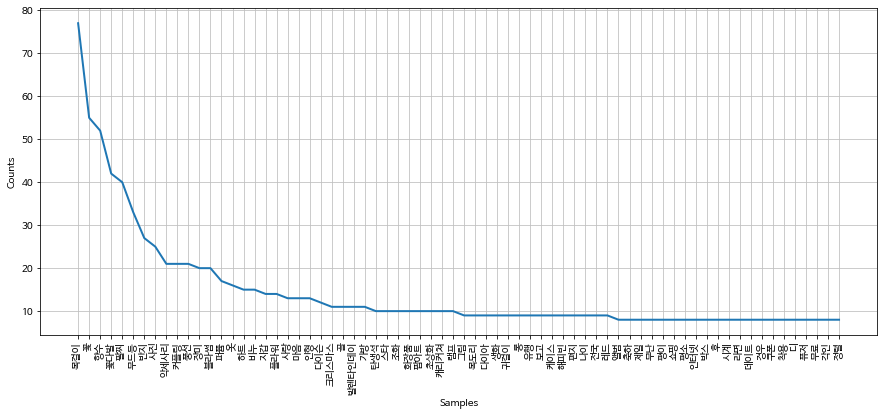

In [80]:
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(15,6))
gift.plot(70)
plt.show()

In [81]:
data = gift.vocab().most_common(300)

In [84]:
# 워드클라우드 생성
wc = WordCloud(relative_scaling=0.2, background_color='white',
               font_path=font_path).generate_from_frequencies(dict(data))

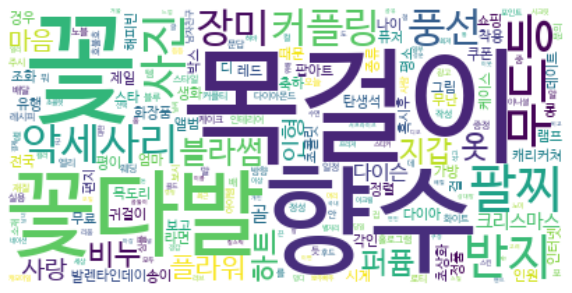

In [85]:
# 워드클라우드 그리기
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* 하트에 표시

In [86]:
mask = np.array(Image.open('heart.jpg'))

In [87]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [88]:
# 워드클라우드 생성
wc = WordCloud(relative_scaling=0.2, background_color='white', mask=mask,
               min_font_size=1, max_font_size=120,
               font_path=font_path).generate_from_frequencies(dict(data))

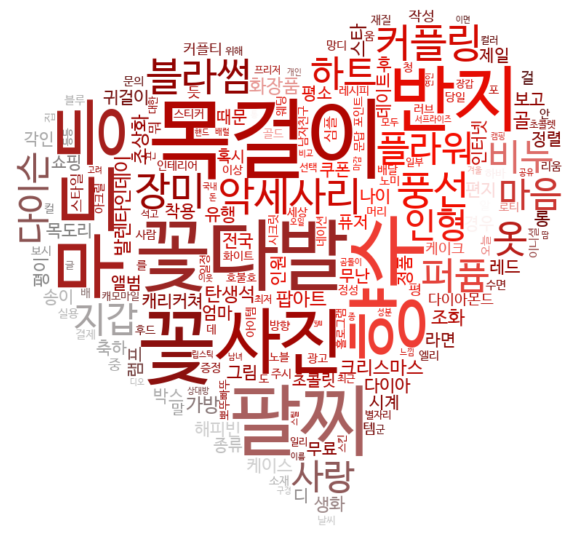

In [91]:
# 워드클라우드 그리기
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()